## Communication neuroscience on a shoestring

### ERP Analysis

This script loads the ERP structure saved in the previous notebook, plots the grand-averaged ERPs, and performs statistical tests on mean amplitude.

#### Import modules

In [1]:
import pickle, scipy.stats, mne, os, warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

#### Load data from after preprocessing

In [2]:
# reload preprocessed data
with open('../data/all_evokeds.pkl', 'rb') as f:
      all_evokeds = pickle.load(f)

num_subjects = len(all_evokeds)

all_evokeds[0] # print first dataset for illustration

[<Evoked  |  'Positive' (average, N=93), [-0.10156, 0.80078] sec, 4 ch, ~25 kB>,
 <Evoked  |  'Neutral' (average, N=67), [-0.10156, 0.80078] sec, 4 ch, ~25 kB>]

### Separate out positive and neutral conditions and create Grand-Average

In [3]:
pos = []
for i in range(len(all_evokeds)):
    pos.append(all_evokeds[i][0])

neu = []
for i in range(len(all_evokeds)):
    neu.append(all_evokeds[i][1])

grand_average_pos = mne.grand_average(pos)
grand_average_neu = mne.grand_average(neu)
print(len(pos))

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
47


### Plot Grand Average ERP for: TP9 & TP10 and for each sensor

combining channels using "mean"
combining channels using "mean"


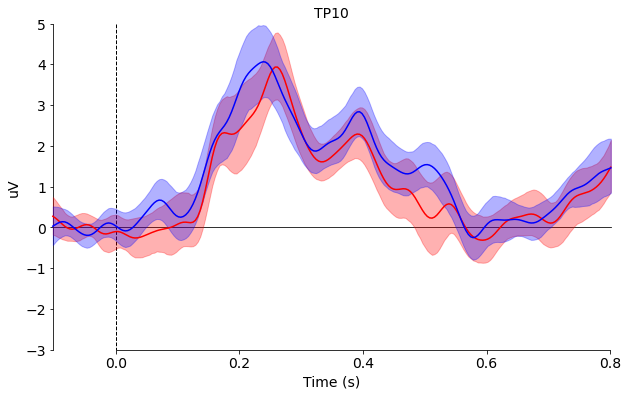

In [4]:
# Tweak the figure style
plt.rcParams.update({
    'ytick.labelsize': 14,
    'xtick.labelsize': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'grid.color': '0.9',
    'grid.linestyle': ':',
})



fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

#'''
mne.viz.plot_compare_evokeds([pos, neu], 
                                 picks = ['TP10'], 
                                 colors = ['red', 'blue'],
                                 show_sensors = False,
                                 legend = None,
                                 ci = True,
                                 ylim  = dict(eeg=[-3, 5]),
                                 #vlines = [ 0.2, 0.3, 0.4, 0.6],
                                 combine = 'mean',
                                 #title = current_title,
                                 axes = axes,
                                ) ; #'''


fig.savefig('fig2_TP10.svg', )


['TP9', 'TP10']
combining channels using "mean"
combining channels using "mean"


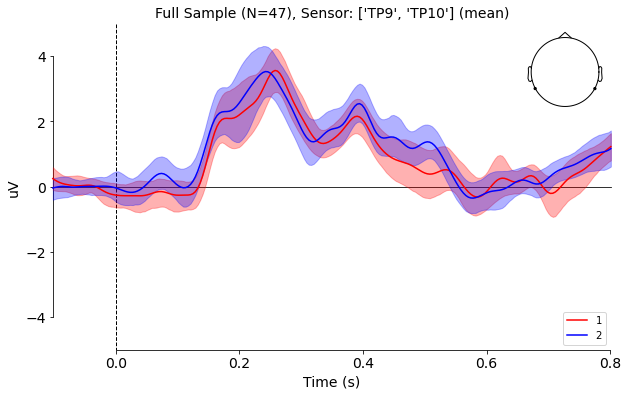

['AF7']
combining channels using "mean"
combining channels using "mean"


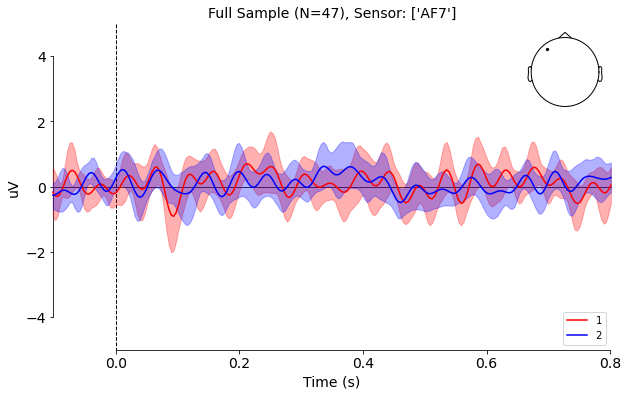

['AF8']
combining channels using "mean"
combining channels using "mean"


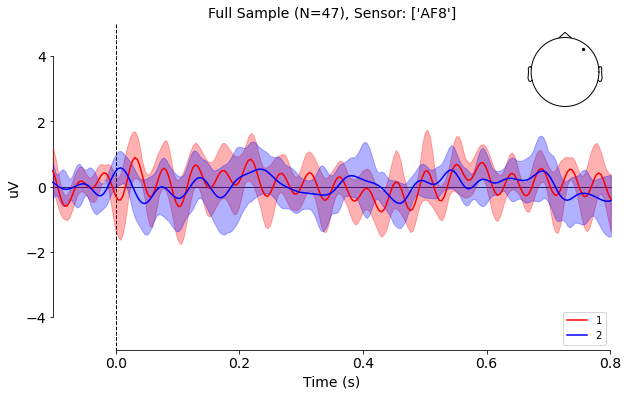

['TP9']
combining channels using "mean"
combining channels using "mean"


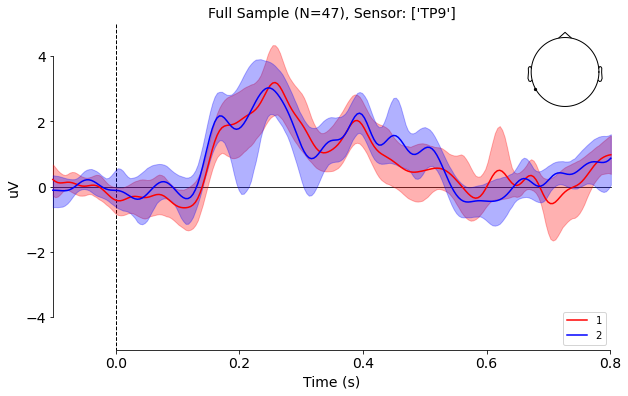

['TP10']
combining channels using "mean"
combining channels using "mean"


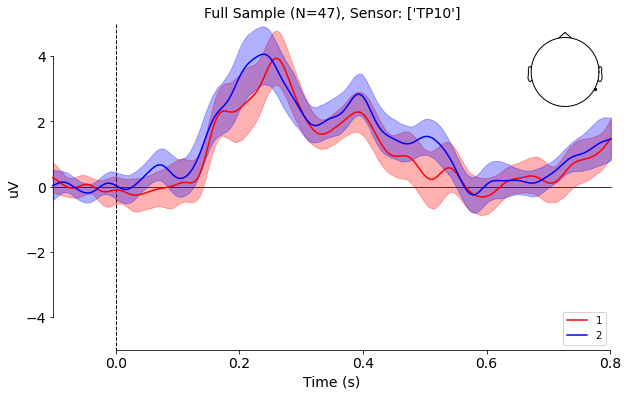

In [5]:
pick_list = [['TP9', 'TP10'], ['AF7'], ['AF8'], ['TP9'], ['TP10']]

for current_pick in pick_list:
    print(current_pick)
    current_title = 'Full Sample (N=47), Sensor: ' + str(current_pick) 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    mne.viz.plot_compare_evokeds([pos, neu], 
                                 picks = current_pick, 
                                 colors = ['red', 'blue'],
                                 show_sensors = True,
                                 legend = 4,
                                 ci = True,
                                 ylim  = dict(eeg=[-5, 5]),
                                 combine = 'mean',
                                 title = current_title,
                                 axes = axes,
                                ) ; 

### Statistical Assessment of ERP differences

Testing for differences in window/cluster
[200, 300]
['TP9', 'TP10']


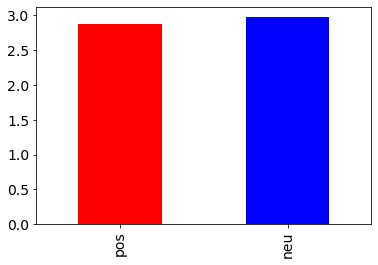


pos    2.877944
neu    2.973201
dtype: float64

Ttest_relResult(statistic=-0.24815372538463454, pvalue=0.8051199446138053)

--------------------------

Testing for differences in window/cluster
[400, 600]
['TP9', 'TP10']


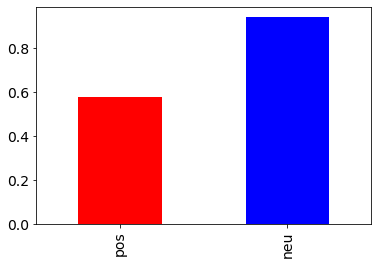


pos    0.579416
neu    0.941493
dtype: float64

Ttest_relResult(statistic=-1.081372169808007, pvalue=0.28516826202240597)

--------------------------

Testing for differences in window/cluster
[500, 550]
['TP9']


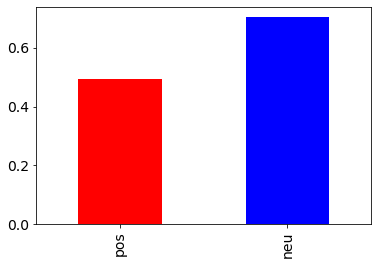


pos    0.493881
neu    0.703289
dtype: float64

Ttest_relResult(statistic=-0.4997804524220954, pvalue=0.6196120373070146)

--------------------------

Testing for differences in window/cluster
[500, 550]
['TP10']


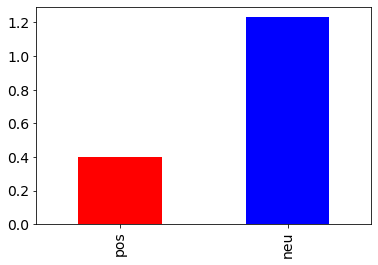


pos    0.399203
neu    1.230965
dtype: float64

Ttest_relResult(statistic=-2.3808201650763183, pvalue=0.02147133632884176)

--------------------------



In [6]:
mne.set_log_level(verbose= 'CRITICAL', return_old_level=False)

windows_of_interest = [[200, 300],
                       [400, 600],
                       [500, 550],
                       [500, 550]
                      ]

clusters_of_interest = [['TP9'  , 'TP10'],
                        ['TP9'  , 'TP10'],
                        ['TP9' ],
                        ['TP10']
                       ]


for i in range(len(windows_of_interest)):
    print('Testing for differences in window/cluster')
    onset_offset_times  = windows_of_interest[i]
    print(onset_offset_times)

    electrodes  = clusters_of_interest[i]
    print(electrodes)

    values      = np.zeros((num_subjects,2))
    ind         = np.arange((2 * num_subjects))
    new_df      = pd.DataFrame(columns = ['sub','cond','value'], index = ind )

    j = 0
    for curr_sub in range(num_subjects):
        values[j,0] = np.mean(pos[j].to_data_frame(picks = electrodes, index = 'time' ).loc[onset_offset_times[0]:onset_offset_times[1]].mean().values);
        values[j,1] = np.mean(neu[j].to_data_frame(picks = electrodes, index = 'time' ).loc[onset_offset_times[0]:onset_offset_times[1]].mean().values);
        j= j +1

    erp_mean_amplitude_df = pd.DataFrame(values, columns = ['pos', 'neu'], index = np.arange(num_subjects))
    erp_mean_amplitude_df.mean().plot(kind = 'bar', color = ['red', 'blue'])
    plt.show()
    
    print()
    print(erp_mean_amplitude_df.mean()) # Mean Amplitude

    print()
    print(scipy.stats.ttest_rel(values[:,0], values[:,1])) 
    
    print('\n--------------------------\n')
